In [1]:
import hes1_langevin_Antoine as langevin
import hes1_master_Antoine as master
import hes1_utils_Antoine as utils

import hes1_utils_general as general
import jochen_utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as spinter
import scipy.fft
import time
import datetime as dt
import os

import time

import warnings
warnings.filterwarnings("ignore")

# Simulation parameters

In [2]:
param_number = 1

In [3]:
if param_number==1:
    alpha_m=1
    alpha_p=1
    mu_m=0.03
    mu_p=0.03
    h=4.1
    P_0=10

    T=10000
    delta_t=0.01
    
    val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
    val_Omega=[1,10,100,1000,5000,10000]
    val_tau=[18.7]

    n_lambda=np.size(val_lambda)
    n_Omega=np.size(val_Omega)
    n_tau=np.size(val_tau)

elif param_number==2:
    '''alpha_m=0.64
    alpha_p=17.32
    mu_m=np.log(2)/30
    mu_p=np.log(2)/90
    h=5.59
    P_0=88288.6

    T=10000
    delta_t=0.01

    val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
    val_Omega=[0.001, 0.01, 0.1, 1]
    val_tau=[34]

    n_lambda=np.size(val_lambda)
    n_Omega=np.size(val_Omega)
    n_tau=np.size(val_tau)'''
    
    
    alpha_m=39.93
    alpha_p=21.56
    mu_m=np.log(2)/30
    mu_p=np.log(2)/90
    h=4.78
    P_0=24201.01

    T=10000
    delta_t=0.01

    n_t=int(T/delta_t)

    val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
    val_Omega=[0.001, 0.01, 0.1, 1]
    val_tau=[33]

    n_lambda=np.size(val_lambda)
    n_Omega=np.size(val_Omega)
    n_tau=np.size(val_tau)
else:
    print('Parameters not supported.')

# Save & Plots parameters

In [4]:
ratio=(1+np.sqrt(5))/2

In [ ]:
date_and_time=time.localtime()
string_date=str(date_and_time.tm_year)+'-'+str(date_and_time.tm_mon)+'-'+str(date_and_time.tm_mday)+'-'+str(date_and_time.tm_hour)+'-'+str(date_and_time.tm_min)+'-'+str(date_and_time.tm_sec)
os.makedirs(os.getcwd() + '\\paper plots ' + string_date)

In [ ]:
read_directory = os.getcwd() + '\\paper plots ' + string_date        #specify here the folder you want to use
#read_directory0 = '2023-12-10-15-25-10'
os.makedirs(read_directory + '\\plots')

In [5]:
font = {
    'family' : 'Arial',
    'color'  : 'black',
    'weight' : 'normal',
    'size'   : 10,
}

# Plotting power spectrum

In [6]:
n_iter=100

T = 10000
sampling_timestep = 10
n_t=int(T/sampling_timestep)

In [7]:
i=10
j=-2
k=0

valueOfLambda = val_lambda[i]
valueOfOmega = val_Omega[j]
valueOfTau = val_tau[k]

#lambda_s = 100
#Omega = 1
#tau = 19.7

print("Value of lambda:", valueOfLambda)
print("Value of Omega:", valueOfOmega)
print("Value of tau:", valueOfTau)

Value of lambda: 0.999999999999999
Value of Omega: 5000
Value of tau: 18.7


In [8]:
t0 = time.time()

output=general.simulate_master_all(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)

print("Computation time:", (time.time() - t0)//60, "min ", (time.time() - t0)%60, "s")


t_ref=output["times"]

freq_ref=output["frequencies"]


std_Mm=output["std Mm"]

std_Pm=output["std Pm"]

mean_Mm=output["mean Mm"]

mean_Pm=output["mean Pm"]

power_spectrum_Mm=output["power spectrum Mm"]
          
power_spectrum_Pm=output["power spectrum Pm"]

Computation time: 21.0 min  51.50561738014221 s


In [9]:
output=general.simulate_langevin_all(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)            
            
t_ref=output["times"]

freq_ref=output["frequencies"]


std_Ml=output["std Ml"]

std_Pl=output["std Pl"]

mean_Ml=output["mean Ml"]

mean_Pl=output["mean Pl"]

power_spectrum_Ml=output["power spectrum Ml"]
          
power_spectrum_Pl=output["power spectrum Pl"]

In [10]:
output=general.simulate_lna_all(n_iter=n_iter,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)            
            
t_ref=output["times"]

freq_ref=output["frequencies"]


std_Mlna=output["std Mlna"]

std_Plna=output["std Plna"]

mean_Mlna=output["mean Mlna"]

mean_Plna=output["mean Plna"]

power_spectrum_Mlna=output["power spectrum Mlna"]
          
power_spectrum_Plna=output["power spectrum Plna"]

NameError: name 'read_directory' is not defined

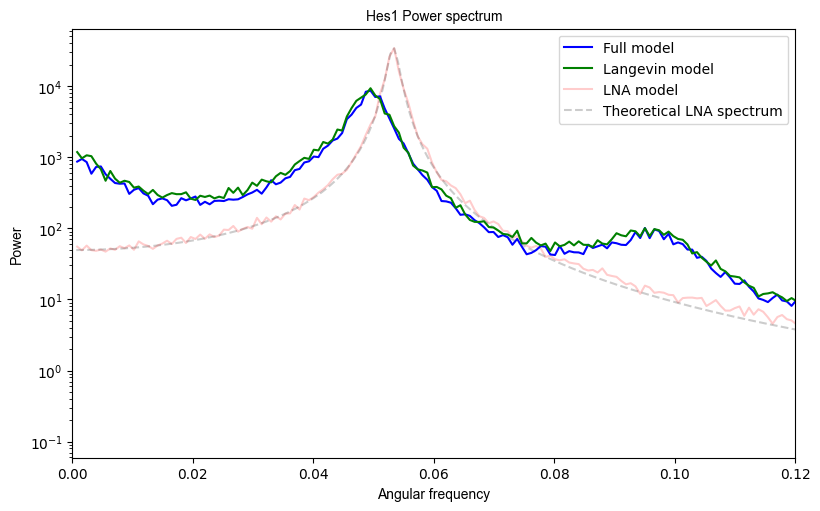

In [12]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Hes1 Power spectrum',fontdict=font) 
ax1.set_xlabel('Angular frequency',fontdict=font) 
ax1.set_ylabel('Power',fontdict=font) 



freq_th,Sm,Sp=utils.lna_power_spectrum(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                h=h,
                                                P_0=P_0,
                                                lambda_s=valueOfLambda,
                                                tau=valueOfTau,
                                                Omega=valueOfOmega,
                                                T=T,
                                                delta_t=sampling_timestep)


linelna,=ax1.plot(freq_ref[1:], power_spectrum_Plna[1:], color = 'red', alpha = 0.2)
linet,=ax1.plot(freq_th[1:], Sp[1:], '--', color = 'black', alpha = 0.2)
linem,=ax1.plot(freq_ref[1:], power_spectrum_Pm[1:], color = 'blue')
linel,=ax1.plot(freq_ref[1:], power_spectrum_Pl[1:], color = 'green')

ax1.tick_params(axis ='y') 
ax1.set_yscale('log')        
ax1.legend([linem, linel, linelna, linet], ['Full model', 'Langevin model', 'LNA model', 'Theoretical LNA spectrum'])

ax1.set_xlim(0, 0.12)
#ax1.set_ylim(10**6, 10**12)


plt.savefig(read_directory +'\\plots\\powerSpectrum-lambda'+str(val_lambda[i])[0:4]+'-Omega'+ str(val_Omega[j])
                                                                              +'-tau'  + str(val_tau[k])  +'.pdf')  
plt.show()

# Plotting STD

In [ ]:
n_iter_master = 100
n_iter_sde = 100

T = 100000
sampling_timestep = 0.01
n_t=int(T/sampling_timestep)

In [ ]:
arr_mean_Mm=np.zeros(n_lambda)
arr_mean_Pm=np.zeros(n_lambda)

arr_mean_Ml=np.zeros(n_lambda)
arr_mean_Pl=np.zeros(n_lambda)

arr_mean_Mlna=np.zeros(n_lambda)
arr_mean_Plna=np.zeros(n_lambda)

In [ ]:
arr_std_Mm=np.zeros(n_lambda)
arr_std_Pm=np.zeros(n_lambda)

arr_std_Ml=np.zeros(n_lambda)
arr_std_Pl=np.zeros(n_lambda)

arr_std_Mlna=np.zeros(n_lambda)
arr_std_Plna=np.zeros(n_lambda)

In [ ]:
arr_momFour_Mm=np.zeros(n_lambda)
arr_momFour_Pm=np.zeros(n_lambda)

arr_momFour_Ml=np.zeros(n_lambda)
arr_momFour_Pl=np.zeros(n_lambda)

arr_momFour_Mlna=np.zeros(n_lambda)
arr_momFour_Plna=np.zeros(n_lambda)

In [ ]:
n_sample_values = np.zeros(n_lambda, dtype=int)

for l in range(n_lambda):
    valueOfLambda = val_lambda[l]
    if valueOfLambda < 0.1:
        n_sample_values[l] = 2
    elif valueOfLambda < 0.5:
        n_sample_values[l] = 20
    elif valueOfLambda < 1:
        n_sample_values[l] = 40
    elif valueOfLambda < 4:
        n_sample_values[l] = 120
    else:
        n_sample_values[l] = 300

In [ ]:
j=-1
k=0

for i in range(n_lambda):

    valueOfLambda = val_lambda[i]
    valueOfOmega = val_Omega[j]
    valueOfTau = val_tau[k]
    
    t0 = time.time()

    print("Value of lambda:", valueOfLambda)
    print("Value of Omega:", valueOfOmega)
    print("Value of tau:", valueOfTau)
    
    #n_iter_master = n_sample_values[i]
        
    output=general.simulate_master_meanAndStd(n_iter=n_iter_master, alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)

    arr_mean_Mm[i]=output["mean Mm"]
    arr_mean_Pm[i]=output["mean Pm"]
    arr_std_Mm[i]=output["std Mm"]
    arr_std_Pm[i]=output["std Pm"]
    arr_momFour_Mm[i]=output["momentumFour Mm"]
    arr_momFour_Pm[i]=output["momentumFour Pm"]

    output=general.simulate_langevin_meanAndStd(n_iter=n_iter_sde,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)            
    arr_mean_Ml[i]=output["mean Ml"]
    arr_mean_Pl[i]=output["mean Pl"]
    arr_std_Ml[i]=output["std Ml"]
    arr_std_Pl[i]=output["std Pl"]
    arr_momFour_Ml[i]=output["momentumFour Ml"]
    arr_momFour_Pl[i]=output["momentumFour Pl"]

    
    output=general.simulate_lna_meanAndStd(n_iter=n_iter_sde,alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=valueOfLambda,
                                                                tau=valueOfTau,
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=valueOfOmega,
                                                                sampling_timestep = sampling_timestep)            
    arr_mean_Mlna[i]=output["mean Mlna"]
    arr_mean_Plna[i]=output["mean Plna"]
    arr_std_Mlna[i]=output["std Mlna"]
    arr_std_Plna[i]=output["std Plna"]
    arr_momFour_Mlna[i]=output["momentumFour Mlna"]
    arr_momFour_Plna[i]=output["momentumFour Plna"]
    
    print("\n")
    print("Number of iterations: ", n_iter_master, n_iter_sde)
    print("Computation time: ", (time.time() - t0)//3600, "h ", ((time.time() - t0)//60)%60, "min ", (time.time() - t0)%60, "s")
    print("\n")


In [ ]:
arr_std_th_Plna=np.zeros(n_lambda)

for i in range(n_lambda):
    
    valueOfLambda = val_lambda[i]
    valueOfOmega = val_Omega[j]
    valueOfTau = val_tau[k]
    
    freq_th,Sm,Sp=utils.lna_power_spectrum(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                h=h,
                                                P_0=P_0,
                                                lambda_s=valueOfLambda,
                                                tau=valueOfTau,
                                                Omega=valueOfOmega,
                                                T=T,
                                                delta_t=sampling_timestep)
    dfreq = freq_th[1]-freq_th[0]
    arr_std_th_Plna[i] = np.sqrt(sum(Sp[1:])*dfreq/np.pi)

In [ ]:
arr_std_Pm2 = np.sqrt(arr_momFour_Pm - (arr_std_Pm**2 + arr_mean_Pm**2)**2)
arr_std_Pl2 = np.sqrt(arr_momFour_Pl - (arr_std_Pl**2 + arr_mean_Pl**2)**2)
arr_std_Plna2 = np.sqrt(arr_momFour_Plna - (arr_std_Plna**2 + arr_mean_Plna**2)**2)

In [ ]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Hes1 concentration STD against lambda',fontdict=font) 
ax1.set_xlabel('lambda',fontdict=font) 
ax1.set_ylabel('Hes1 concentration STD',fontdict=font)

linelna,=ax1.plot(val_lambda, arr_std_Plna, color = 'red', alpha = 0.5)
linet,=ax1.plot(val_lambda, arr_std_th_Plna,'--', color = 'black', alpha = 0.5)
linem,=ax1.plot(val_lambda, arr_std_Pm, color = 'blue')
linel,=ax1.plot(val_lambda, arr_std_Pl, color = 'green')

ax1.tick_params(axis ='y')
ax1.legend([linem, linel, linelna, linet], ['Full model', 'Langevin model', 'LNA model', 'Theoretical LNA STD'])
ax1.set_xscale('log')
ax1.set_yscale('log')        


#ax1.set_xlim(1,100)
#ax1.set_ylim(1.5*10**3, 6*10**3)

plt.savefig(read_directory +'\\plots\\std-plots-Omega' + str(val_Omega[j]) + '-tau' + str(val_tau[k]) + '.pdf')  
plt.show()

In [ ]:
arr_rel_Pl = abs(arr_std_Pm - arr_std_Pl)/arr_std_Pm
arr_rel_Plna = abs(arr_std_Pm - arr_std_Plna)/arr_std_Pm
arr_rel_th_Plna = abs(arr_std_Pm - arr_std_th_Plna)/arr_std_Pm

In [ ]:
n_sample_by_traj = round((T-2000)/sampling_timestep)

In [ ]:
err_arr_varPl=(1/np.sqrt(n_iter_sde) * (arr_std_Pl2/arr_std_Pl**2 + 2*arr_mean_Pl/arr_std_Pl) + 1/np.sqrt(n_iter_master) * (arr_std_Pm2/arr_std_Pm**2 + 2*arr_mean_Pm/arr_std_Pm))/np.sqrt(4*n_sample_by_traj)
err_arr_varPlna=(1/np.sqrt(n_iter_sde) * (arr_std_Plna2/arr_std_Plna**2+ 2*arr_mean_Plna/arr_std_Plna) + 1/np.sqrt(n_iter_master) * (arr_std_Pm2/arr_std_Pm**2 + 2*arr_mean_Pm/arr_std_Pm))/np.sqrt(4*n_sample_by_traj)
err_arr_varPth=1/np.sqrt(n_sample_values) * (arr_std_Pm2/arr_std_Pm**2 + 2*arr_mean_Pm/arr_std_Pm) / np.sqrt(4*n_sample_by_traj)

In [ ]:
err_arr_varAll = np.maximum(err_arr_varPl*(arr_rel_Pl+1), err_arr_varPlna*(arr_rel_Plna+1), err_arr_varPth*(arr_rel_th_Plna+1))

In [ ]:
fig = plt.figure(figsize=(5*ratio,5), constrained_layout = True) 

ax1 = plt.gca()

ax1.set_title('Hes1 concentration STD relative error against lambda') 
ax1.set_xlabel('lambda') 
ax1.set_ylabel('STD relative error')

linel,=ax1.plot(val_lambda, arr_rel_Pl, color = 'red')
linelna,=ax1.plot(val_lambda, arr_rel_Plna, color = 'orange')
linet,=ax1.plot(val_lambda, arr_rel_th_Plna, color = 'black')

#linelim, = ax1.plot(val_lambda, err_arr_varAll*30, '--', color = 'purple', alpha = 0.1)
#linelim, = ax1.plot(val_lambda, err_arr_varAll*20, '--', color = 'purple', alpha = 0.2)
#linelim, = ax1.plot(val_lambda, err_arr_varAll*10, '--', color = 'purple', alpha = 0.3)

ax1.legend([linel, linelna, linet], ['Langevin model STD', 'LNA model STD', 'Theoretical LNA STD'], loc='upper right')

#ax1.fill_between(val_lambda, err_arr_varAll*30, color = 'purple', alpha = 0.1)
#ax1.fill_between(val_lambda, err_arr_varAll*20, color = 'purple', alpha = 0.2)
#ax1.fill_between(val_lambda, err_arr_varAll*10, color = 'purple', alpha = 0.3)


ax1.tick_params(axis ='y') 
ax1.set_xscale('log')
ax1.set_yscale('log')        


#ax1.set_xlim(0, 0.15)
#ax1.set_ylim(5*10**(-4), 2)

plt.savefig(read_directory +'\\plots\\error-std-plots-Omega' + str(val_Omega[j]) + '-tau' + str(val_tau[k]) + '.pdf')  
plt.show()

In [ ]:
try:
    os.makedirs(read_directory+'\\data1')
    os.makedirs(read_directory+'\\data2')
except FileExistsError:
    pass

In [ ]:
pd.DataFrame(val_lambda,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\lambda.csv')
pd.DataFrame(val_Omega,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\Omega.csv')
pd.DataFrame(val_tau,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\tau.csv')

pd.DataFrame(arr_std_Mm,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Mm.csv')
pd.DataFrame(arr_std_Pm,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Pm.csv')
pd.DataFrame(arr_std_Ml,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Ml.csv')
pd.DataFrame(arr_std_Pl,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Pl.csv')
pd.DataFrame(arr_std_Mlna,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Mlna.csv')
pd.DataFrame(arr_std_Plna,columns=['value']).to_csv(read_directory+'\\data'+str(param_number)+'\\std-Plna.csv')